<a href="https://colab.research.google.com/github/Guneshwar24/ACIT4610-Evolutionary-Algo/blob/main/Particle_Swarm_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PARTICLE SWARM OPTIMISATION

Enter the number of queens (N): 8
Enter initial positions of queens separated by commas (or press enter to randomize): 
Generation 1: Best Fitness = 8
Found a valid solution after 1 generations
[4, 1, 3, 5, 7, 2, 0, 6]


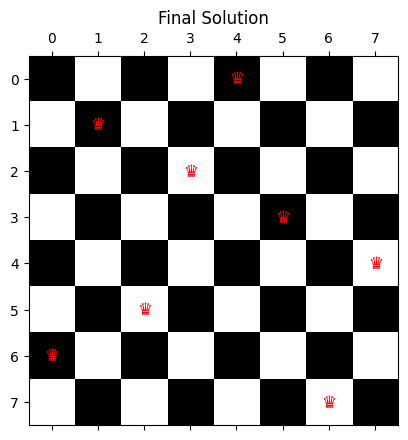

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

def initialize_population(pop_size, n, initial_positions=None):
    population = []
    for _ in range(pop_size):
        if initial_positions:
            chromosome = initial_positions[:]
        else:
            chromosome = list(range(n))
            random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness(chromosome):
    n = len(chromosome)
    conflicts = 0
    for i in range(n):
        for j in range(i + 1, n):
            if chromosome[i] == chromosome[j] or abs(i - j) == abs(chromosome[i] - chromosome[j]):
                conflicts += 1
    return n - conflicts

def clonal_selection(population, clone_rate, mutation_rate):
    sorted_population = sorted(population, key=lambda x: -fitness(x))
    n = len(sorted_population[0])
    clone_population = []
    for chromosome in sorted_population[:clone_rate]:
        for _ in range(clone_rate):
            clone = chromosome[:]
            for i in range(n):
                if random.random() < mutation_rate:
                    j = random.randint(0, n - 1)
                    clone[i], clone[j] = clone[j], clone[i]
            clone_population.append(clone)
    return clone_population

def adapt_parameters(n):
    if n <= 20:
        pop_size = 100
        clone_rate = 20
        max_generations = 1000
        mutation_rate = 0.1
    else:
        pop_size = 50
        clone_rate = 40
        max_generations = 2000
        mutation_rate = 0.05
    return pop_size, clone_rate, max_generations, mutation_rate

def ais_queen(n, initial_positions=None):
    if n < 4:
        return None, 0
    pop_size, clone_rate, max_generations, mutation_rate = adapt_parameters(n)
    population = initialize_population(pop_size, n, initial_positions)
    for generation in range(max_generations):
        population = clonal_selection(population, clone_rate, mutation_rate)
        best_chromosome = max(population, key=lambda x: fitness(x))
        print(f"Generation {generation + 1}: Best Fitness = {fitness(best_chromosome)}")
        if fitness(best_chromosome) == n:
            return best_chromosome, generation + 1
    return None, max_generations

def plot_solution(solution, title="n-Queens Solution"):
    if solution is None:
        print("No solution found, so no plot will be generated.")
        return

    board_size = len(solution)
    chessboard = np.zeros((board_size, board_size), dtype=int)
    for i in range(board_size):
        for j in range(board_size):
            if (i + j) % 2 == 0:
                chessboard[i][j] = 1
    fig, ax = plt.subplots()
    cmap = plt.get_cmap('binary', 2)
    ax.matshow(chessboard, cmap=cmap)
    queen = u'\u265B'  # Unicode character for queen
    for row, col in enumerate(solution):
        ax.text(col, row, queen, va='center', ha='center', color='red', fontsize=12)
    plt.title(title)
    plt.show()

if __name__ == "__main__":
    n = int(input("Enter the number of queens (N): "))
    if n < 4:
        print("The n-Queens problem is not valid for N less than 4.")
    else:
        initial_positions = input("Enter initial positions of queens separated by commas (or press enter to randomize): ")
        if initial_positions:
            initial_positions = list(map(int, initial_positions.split(",")))
            if len(initial_positions) != n:
                print("Invalid initial positions length. No solution will be sought.")
                initial_positions = None
                solution, generations = None, 0
            elif len(set(initial_positions)) != n:
                print("Invalid initial positions with duplicates. No solution will be sought.")
                initial_positions = None
                solution, generations = None, 0
            else:
                plot_solution(initial_positions, "Initial positions by user")
                solution, generations = ais_queen(n, initial_positions)
        else:
            solution, generations = ais_queen(n, None)
        if solution:
            print(f"Found a valid solution after {generations} generations")
            print(solution)
            plot_solution(solution, "Final Solution")
        elif generations > 0:
            print(f"No solution found within {generations} generations.")